In [26]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import numpy as np
import matplotlib.pyplot as plt

This code determines the best solution to the energy points game.

In [27]:
# Set up the grid 
t_min = 0.0
t_max = 14.0
x_min = -5.0
x_max = 10.0 #At least 10
initial_x = 5.0

delta_t = 0.2
delta_x = 0.02

N_t = int((t_max - t_min)/delta_t + 1.0000001)
N_x = int((x_max - x_min)/delta_x + 1.0000001)

t = np.zeros(N_t)
x = np.zeros(N_x)

for i in range(N_t):
    t[i] = t_min + i*delta_t
for j in range(N_x):
    x[j] = x_min + j*delta_x


In [28]:
# Determine the Lagrangian

Lagr = np.zeros((N_x,N_x))

a=0.5 # weight on the starting vs. ending value of x over a delta_t time period. a=0.5 equally weights both.

for i in range(N_x):
    Lagr[i,:] = (a*x[i]+ (1-a)*x[:])**2 + ((x[:]-x[i])/delta_t)**2 # INSERT YOUR CODE HERE!


In [29]:
# Value function (keeping track of the optimal strategy)

V = np.zeros((N_t,N_x))  # Value function
Utility = np.zeros(N_x)  # The optimal utilty is the value function
Opt_x_index = np.zeros((N_t,N_x)).astype('int')  # Optimal x (index) value to go to at the next t value

#Value at the final time
#Insert your code here!
problem_letter = 'a' #CHANGE THIS LETTER TO CHANGE WHICH PROBLEM YOU'RE DOING

if(problem_letter == 'a'):
    x_zero_index = int(((0-x_min)/delta_x)) #find the index of x=0
    V[N_t-1,:] = np.Inf                     #all the values in V should be infinity
    V[N_t-1, x_zero_index] = 1              #except for at x=0, where it should be 1
elif(problem_letter == 'b'):
    V[N_t-1,:] = (-50)*np.sqrt(np.abs(x))
elif(problem_letter == 'c'):
    V[N_t-1,:] = (200/np.pi)*np.arctan(x)
else:
    print("NOT A VALID PROBLEM LETTER")

#Main loop
for i in range(N_t-2,-1,-1):
    for j in range(N_x):
        Utility[:] = Lagr[j,:] + V[i+1,:]
        V[i,j] = min(Utility)# INSERT YOUR CODE HERE!
        Opt_x_index[i,j] = np.argmin(Utility)   
        


The minimum energy points are 501.038

To get there, you will take the following path:


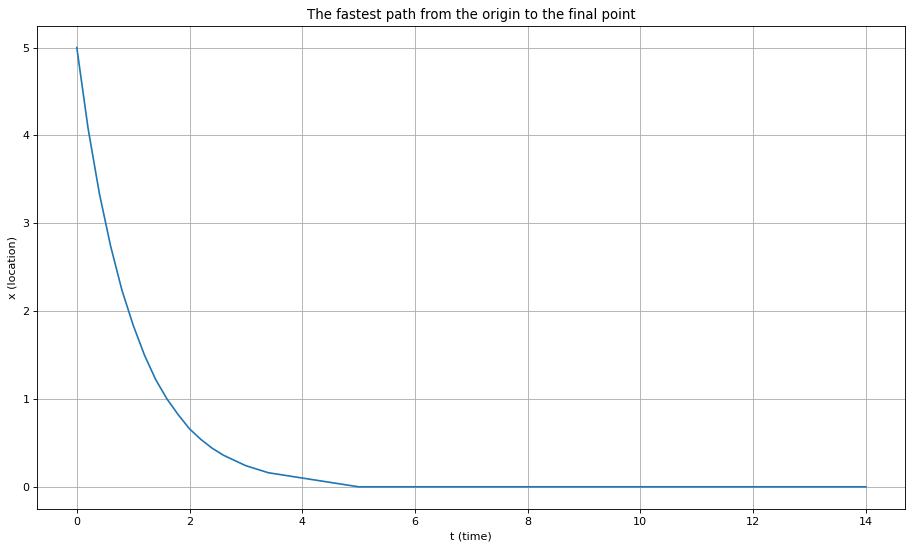

In [30]:
# Plot the results and solution

t_plot = t[:]
x_plot = np.zeros(N_t)

print("")
print("The minimum energy points are", V[0,N_x-1].round(3))
print("")
print("To get there, you will take the following path:")

j = np.argmin(abs(x[:]-initial_x))
x_plot[0] = x[j]

for i in range(N_t-1):
    x_plot[i+1] = x[Opt_x_index[i,j]]
    j = Opt_x_index[i,j]

plt.figure(figsize=(14, 8), dpi=80)
plt.plot(t_plot,x_plot)
plt.title('The fastest path from the origin to the final point')
plt.xlabel('t (time)'); plt.ylabel('x (location)')
plt.grid()
plt.show()

    